In [1]:
import numpy as np
import pandas as pd

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [4]:
df = pd.read_csv('/content/spam.csv',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df.rename(columns = {'v1':'labels', 'v2':'message'}, inplace=True)
df.head()

,labels,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df.drop_duplicates(inplace=True)
df.shape

(5169, 2)

In [8]:
df['label'] = df['labels'].map({'ham': 0, 'spam': 1})
df.head()

,labels,message,label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [9]:
df.drop(['labels'], axis=1, inplace=True)
df.head()

,message,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [21]:
import re
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

import string

def preprocess_text(message):

    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords/conjunctions
    3. Returns a list of the cleaned text

    """
    # Check characters to see if they are in punctuation
    without_punc = [char for char in message if char not in string.punctuation]

    # Join the characters again to form the string.
    without_punc = ''.join(without_punc)

    # Now just remove any stopwords
    return [word for word in without_punc.split() if word.lower() not in stopwords.words('english')]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


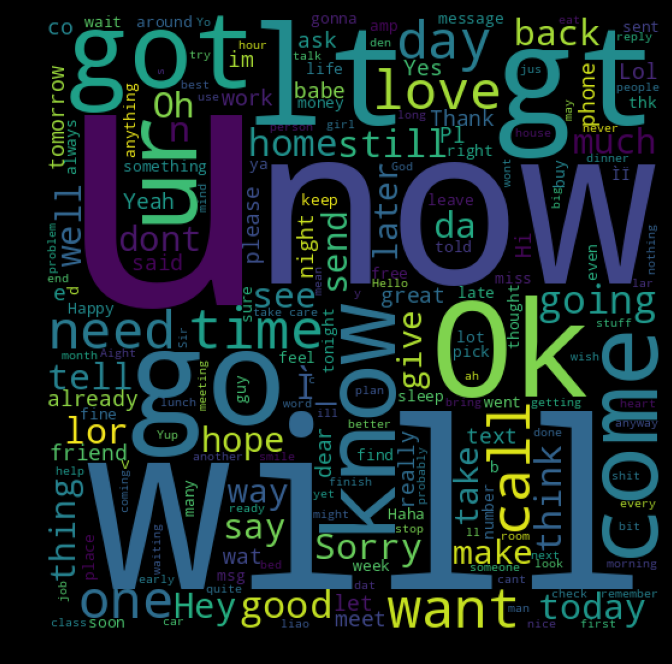

In [16]:
from wordcloud import WordCloud

ham_words = ' '.join(list(df[df['label'] == 0]['message']))
ham_wc = WordCloud(width = 512,height = 512).generate(ham_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(ham_wc)
plt.show()

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
x = df['message']
y = df['label']
cv = CountVectorizer()
x= cv.fit_transform(x)

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB().fit(x_train, y_train)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred = classifier.predict(x_test)
print(classification_report(y_test, pred))
print()
print('Confusion Matrix:\n',confusion_matrix(y_test, pred))
print()
print('Accuracy : ',accuracy_score(y_test, pred))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       885
           1       0.91      0.93      0.92       149

    accuracy                           0.98      1034
   macro avg       0.95      0.96      0.96      1034
weighted avg       0.98      0.98      0.98      1034


Confusion Matrix:
 [[872  13]
 [ 10 139]]

Accuracy :  0.9777562862669246


In [23]:
def sms(text):

    # creating a list of labels
    labels = ['not spam','spam']

    # perform tokenization
    x = cv.transform(text).toarray()

    # predict the text
    p = classifier.predict(x)

    # convert the words in string with the help of list
    s = [str(i) for i in p]
    a = int("".join(s))

    # show out the final result
    res = str("This message is looking: "+ labels[a])
    print(res)


In [24]:
sms(['text you want to get the result for'])

This message is looking: not spam
